In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
drive = '/content/drive/MyDrive/DataAnalysisKnock/9章/'

# 9章 潜在顧客を把握するための画像認識１０本

ここでは、カメラから取得した映像を用いて画像認識を行い、  
必要な情報を取得するための流れを学ぶことで、  
画像認識をビジネス現場で応用するイメージをつかみます。

### ノック８１：画像データを読み込んでみよう

In [3]:
from google.colab.patches import cv2_imshow

In [4]:
import cv2

img = cv2.imread(drive + 'img/img01.jpg')
height, width = img.shape[:2]
print(f'画像幅{str(width)}')
print(f'画像高さ{str(height)}')
cv2_imshow(img)
cv2.waitKey(0)

Output hidden; open in https://colab.research.google.com to view.

### ノック８２：映像データを読み込んでみよう

In [ ]:
cap = cv2.VideoCapture(drive + 'mov/mov01.avi')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)

print('画像幅：' + str(width))
print('画像高さ：' + str(height))
print('総フレーム数：' + str(count))
print('FPS：' + str(fps))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.


### ノック８３：映像を画像に分割し、保存してみよう

In [ ]:
import cv2
cap = cv2.VideoCapture(drive + 'mov/mov01.avi')
num = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    num += 1

cap.release()
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

### ノック８４：画像内のどこに人がいるのかを検出してみよう

In [6]:
import cv2

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {
    'winStride': (8, 8),
    'padding': (32, 32),
    'scale': 1.05,
    'hitThreshold': 0,
    'finalThreshold': 5
}

img = cv2.imread(drive + 'img/img01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
human, r = hog.detectMultiScale(gray, **hogParams)
if len(human > 0):
    for (x, y, w, h) in human:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), 3)

cv2_imshow(img)
cv2.waitKey(0)

Output hidden; open in https://colab.research.google.com to view.

### ノック８５：画像内の人の顔を検出してみよう

In [8]:
import cv2

cascade_file = drive + 'haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

img = cv2.imread(drive + 'img/img02.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = cascade.detectMultiScale(gray, minSize=(50, 50))

for (x, y, w, h) in face_list:
    color = (0, 0, 225)
    pen_w = 3
    cv2.rectangle(img, (x, y), (x + w, y + h), color, thickness = pen_w)

cv2_imshow(img)
cv2.imwrite('temp.jpg', img)
cv2.waitKey(0)

Output hidden; open in https://colab.research.google.com to view.

### ノック８６：画像内の人がどこに顔を向けているのかを検出してみよう

In [11]:
import cv2
import dlib
import math

predictor = dlib.shape_predictor(drive + 'shape_predictor_68_face_landmarks.dat')
detector = dlib.get_frontal_face_detector()

img = cv2.imread(drive + 'img/img02.jpg')
dets = detector(img, 1)

for k, d in enumerate(dets):
    shape = predictor(img, d)

    # 顔領域の標示
    color_f = (0, 0, 255)
    color_l_out = (255, 0, 0)
    color_l_in = (0, 255, 0)
    line_w = 3
    circle_r = 3
    fontType = cv2.FONT_HERSHEY_SIMPLEX
    fontSize = 1

    cv2.rectangle(img, (d.left(), d.top()), (d.right(), d.bottom()), color_f, line_w)
    cv2.putText(img, str(k), (d.left(), d.top()), fontType, fontSize, color_f, line_w)

    # 重心を導出する箱を用意
    num_of_points_out = 17
    num_of_points_in = shape.num_parts - num_of_points_out
    gx_out = 0
    gy_out = 0
    gx_in = 0
    gy_in = 0
    for shape_point_count in range(shape.num_parts):
        shape_point = shape.part(shape_point_count)
        # print(f'顔器官No.{shape_point_count} 座標位置：{shape_point.x}, {shape_point.y}')

        # 器官ごとに描画
        if shape_point_count < num_of_points_out:
            cv2.circle(img, (shape_point.x, shape_point.y), circle_r, color_l_out, line_w)
            gx_out += shape_point.x / num_of_points_out
            gy_out += shape_point.y / num_of_points_out
        else:
            cv2.circle(img, (shape_point.x, shape_point.y), circle_r, color_l_in, line_w)
            gx_in += shape_point.x / num_of_points_in
            gy_in += shape_point.y / num_of_points_in

    # 重心位置を描画
    cv2.circle(img, (int(gx_out), int(gy_out)), circle_r, (0, 0, 225), line_w)
    cv2.circle(img, (int(gx_in), int(gy_in)), circle_r, (0, 0, 0), line_w)

    # 顔の方位を計算
    theta = math.asin(2 * (gx_in - gx_out) / (d.right() - d.left()))
    radian = theta * 180 / math.pi
    print(f'顔方位：{theta} （角度：{radian}度）')

    # 顔方位を表示
    if radian < 0:
        textPrefix = '  left'
    else:
        textPrefix = '  right'
    
    textShow = textPrefix + str(round(abs(radian), 1)) + 'deg.'
    cv2.putText(img, textShow, (d.left(), d.top()), fontType, fontSize, color_f, line_w)

cv2_imshow(img)
cv2.imwrite('temp.jpg', img)
cv2.waitKey(0)

Output hidden; open in https://colab.research.google.com to view.

### ノック８７：検出した情報を統合し、タイムラプスを作ってみよう

In [13]:
cap = cv2.VideoCapture(drive + 'mov/mov01.avi')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {
    'winStride': (8, 8),
    'padding': (32, 32),
    'scale': 1.05,
    'hitThreshold': 0,
    'finalThreshold': 5
}

movie_name = 'timelapse.avi'
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
video = cv2.VideoWriter(movie_name, fourcc, 30, (width, height))


num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if num%10 == 0:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if len(human > 0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 3)

            video.write(frame)

    else:
        break

    num += 1

video.release()
cap.release()
cv2.destroyAllWindows()

### ノック８８：全体像をグラフにして可視化してみよう

In [20]:
import pandas as pd

cap = cv2.VideoCapture(drive + 'mov/mov01.avi')
fps = cap.get(cv2.CAP_PROP_FPS)

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {
    'winStride': (8, 8),
    'padding': (32, 32),
    'scale': 1.05,
    'hitThreshold': 0,
    'finalThreshold': 5
}


num = 0
list_df = pd.DataFrame(columns=['time', 'people'])
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if num%10 == 0:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if len(human > 0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 3)

            tmp_se = pd.Series([num/fps, len(human)], index=list_df.columns)
            list_df = list_df.append(tmp_se, ignore_index=True)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    else:
        break

    num += 1

cap.release()
cv2.destroyAllWindows()

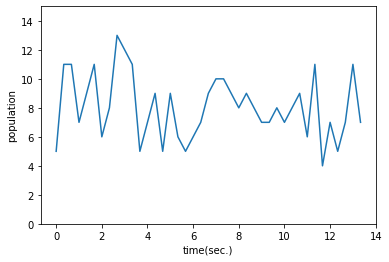

In [16]:
import matplotlib.pyplot as plt
plt.plot(list_df["time"], list_df["people"])
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.show()

### ノック８９：人通りの変化をグラフで確認しよう

In [21]:
import pandas as pd

cap = cv2.VideoCapture(drive + 'mov/mov02.avi')
fps = cap.get(cv2.CAP_PROP_FPS)

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {
    'winStride': (8, 8),
    'padding': (32, 32),
    'scale': 1.05,
    'hitThreshold': 0,
    'finalThreshold': 5
}


num = 0
list_df2 = pd.DataFrame(columns=['time', 'people'])
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if num%10 == 0:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if len(human > 0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 3)

            tmp_se = pd.Series([num/fps, len(human)], index=list_df2.columns)
            list_df2 = list_df2.append(tmp_se, ignore_index=True)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    else:
        break

    num += 1

cap.release()
cv2.destroyAllWindows()

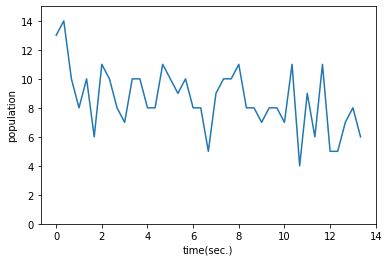

In [22]:
import matplotlib.pyplot as plt
plt.plot(list_df2["time"], list_df2["people"])
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.show()

### ノック９０：移動平均を計算することでノイズの影響を除去しよう

In [19]:
import numpy as np

def moving_average(x, y):
    y_conv = np.convolve(y, np.ones(5) / float(5), mode='valid')
    x_dat = np.linspace(np.min(x), np.max(x), np.size(y_conv))
    return x_dat, y_conv

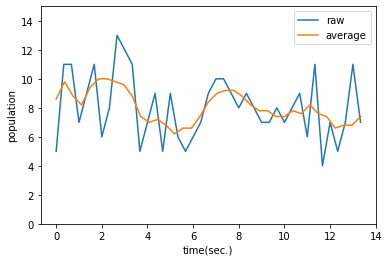

In [25]:
plt.plot(list_df["time"], list_df["people"], label="raw")
ma_x, ma_y = moving_average(list_df["time"], list_df["people"])
plt.plot(ma_x,ma_y, label="average")
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.legend()
plt.show()

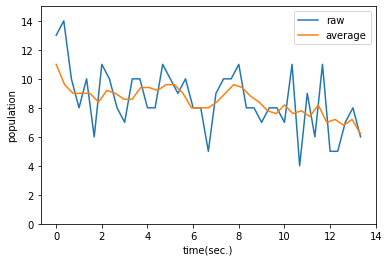

In [26]:
plt.plot(list_df2["time"], list_df2["people"], label="raw")
ma_x2, ma_y2 = moving_average(list_df2["time"], list_df2["people"])
plt.plot(ma_x2,ma_y2, label="average")
plt.xlabel('time(sec.)')
plt.ylabel('population')
plt.ylim(0,15)
plt.legend()
plt.show()